In [12]:
# Importamos librerías
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [13]:
# Ruta al conjunto de datos descomprimido
ruta_entrenamiento = 'Imagenes_Entrenar'
ruta_pruebas = 'Imagenes_Procesar'

In [14]:
# Obtener los nombres de las carpetas (clases)
class_names = os.listdir(ruta_entrenamiento)
class_names_pr = os.listdir(ruta_pruebas)

In [15]:
# Crear los conjuntos de datos
datos_entrenamiento = tf.keras.preprocessing.image_dataset_from_directory(
    ruta_entrenamiento,
    image_size=(100, 100),
    batch_size=32,
    class_names=class_names,  # Usar la lista de nombres de clases
    seed=123  # Semilla para reproducibilidad
)

datos_pruebas = tf.keras.preprocessing.image_dataset_from_directory(
    ruta_pruebas,
    image_size=(100, 100),
    batch_size=32,
    class_names=class_names_pr,  # Usar la lista de nombres de clases
    seed=123  # Semilla para reproducibilidad
)

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


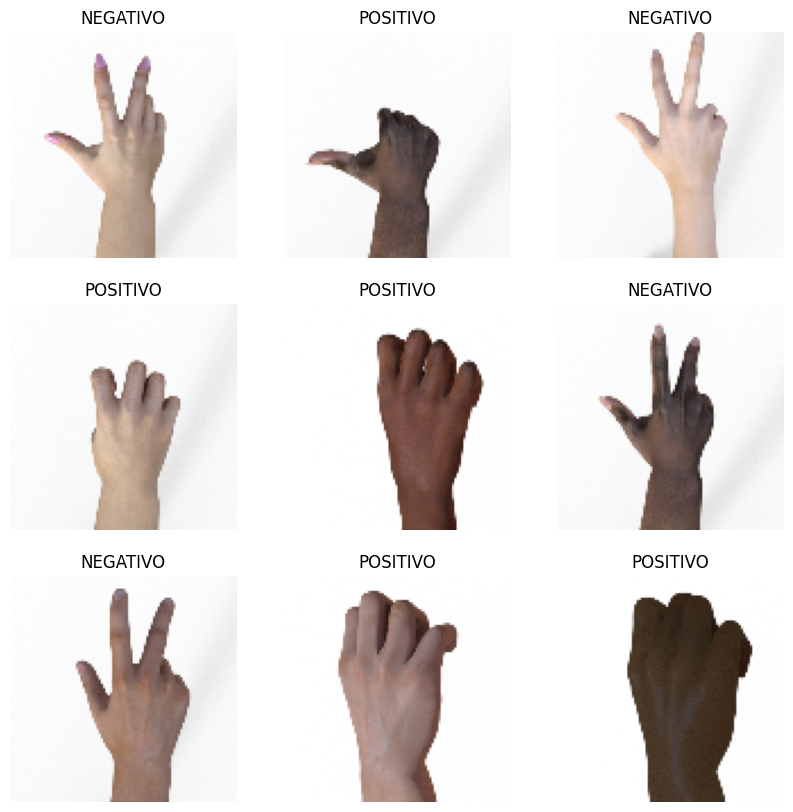

In [16]:
def mostrar_imagenes(dataset, class_names, num_imagenes=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(num_imagenes, images.shape[0])):  # Asegurarse de no exceder el número de imágenes
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].numpy()])  # Asegúrate de convertir etiquetas a numpy
            plt.axis("off")
    plt.show()

# Llamar a la función para mostrar imágenes
mostrar_imagenes(datos_entrenamiento, class_names)



In [17]:
# Normalizar imágenes (escala de 0 a 1)
normalizar = layers.Rescaling(1./255)
datos_entrenamiento = datos_entrenamiento.map(lambda x, y: (normalizar(x), y))
datos_pruebas = datos_pruebas.map(lambda x, y: (normalizar(x), y))


In [18]:
from tensorflow.keras import regularizers

modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    # Dropout para evitar sobreajuste
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


In [19]:
# Compilar el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Entrenar el modelo
historial = modelo.fit(datos_entrenamiento, epochs=10, validation_data=datos_pruebas)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 343ms/step - accuracy: 0.7210 - loss: 2.4123 - val_accuracy: 0.3441 - val_loss: 1.1930
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.9981 - loss: 0.0521 - val_accuracy: 0.7285 - val_loss: 0.7132
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 1.0000 - loss: 0.0369 - val_accuracy: 0.6452 - val_loss: 0.7685
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 333ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.5349 - val_loss: 1.2576
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 358ms/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 0.5349 - val_loss: 1.5970
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 351ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 0.6586 - val_loss: 1.1812
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 1.0000 - loss: 0.0303 - val_accuracy: 0.7608 - val_loss: 0.9192
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accu

In [21]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(datos_pruebas)
print(f"Pérdida en prueba: {loss:.4f}, Precisión en prueba: {accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7597 - loss: 1.0920
Pérdida en prueba: 1.0202, Precisión en prueba: 0.7903


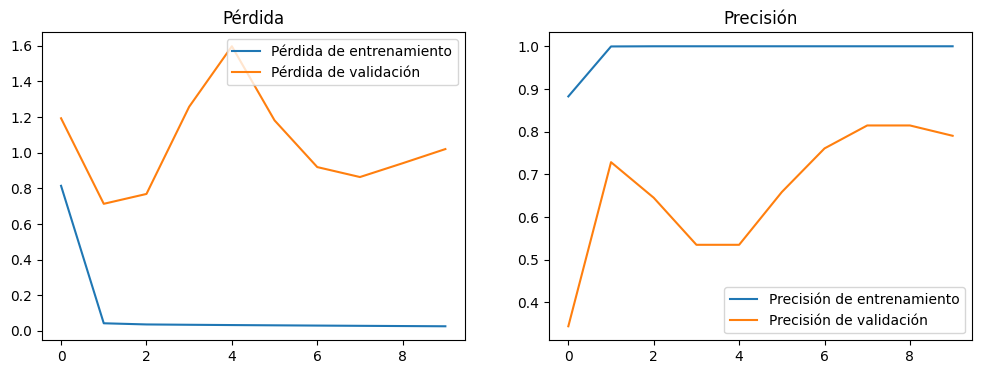

In [22]:
# Visualización de la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión')
plt.legend()

plt.show()

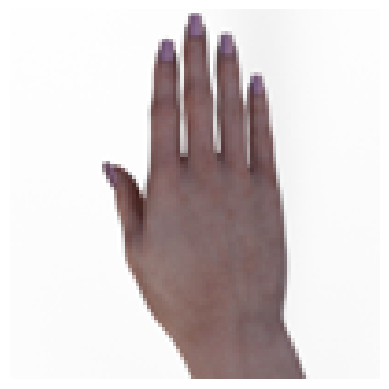

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción: NEUTRAL con una confianza de 99.91%


In [26]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image  # Importar Image desde PIL

# EL CONTENIDO ENTRE LAS DOS BARRAS DE ABAJO SE PUEDE CAMBIAR, DEPENDIENDO SI QUEREMOS USAR UNA IMAGEN DE GOOGLE O DE ARCHIVO 
# ----------------------------------------SI QUEREMOS USAR UNA IMAGEN DE GOOGLE, USAREMOS ESTE FRAGMENTO DE CODIGO ↓↓↓↓ ------------------------------------------------
# Cargar la imagen
ruta_imagen = input("Ingrese la ruta de la imagen: ")
imagen_prueba = Image.open(ruta_imagen)
# ----------------------------------------SI QUEREMOS USAR UNA IMAGEN DE GOOGLE, USAREMOS ESTE FRAGMENTO DE CODIGO ↓↓↓↓ -------------------------------------------------
'''
# URL de la imagen que quieres probar
url_imagen = input('')


# Descargar la imagen desde la URL
response = requests.get(url_imagen)
imagen_prueba = Image.open(BytesIO(response.content))
'''
# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Convertir a RGB si es necesario
if imagen_prueba.mode != 'RGB':
    imagen_prueba = imagen_prueba.convert('RGB')

# Ajustar tamaño a 100x100
imagen_prueba = imagen_prueba.resize((100, 100))

# Mostrar la imagen descargada
plt.imshow(imagen_prueba)
plt.axis('off')
plt.show()

# Convertir la imagen en array y preprocesar
imagen_array = image.img_to_array(imagen_prueba)  # Convertir a array de numpy

# Añadir dimensión para el lote (batch)
imagen_array = np.expand_dims(imagen_array, axis=0)

# Normalizar a rango 0-1
imagen_array = imagen_array / 255.0

# Hacer la predicción
prediccion = modelo.predict(imagen_array)

# Mostrar los resultados
indice_prediccion = np.argmax(prediccion[0])  # Índice de la clase con mayor probabilidad
nombre_clase = class_names[indice_prediccion]  # Obtener el nombre de la clase
confianza = 100 * np.max(prediccion[0])  # Confianza en porcentaje

print(f"Predicción: {nombre_clase} con una confianza de {confianza:.2f}%")
